# <center>House Prices - Advanced Regression Techniques</center>
===========================================================================================================================================
<p align="right"><center>王鑫轶 大数据2001</center></p>

# 一、数据预览

## 1.1 导入相关库

In [1]:
# 导入数据分析的相关库
import pandas as pd
import numpy as np
#画图
import matplotlib as plt
import seaborn as sns 
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # 该库可以忽略警告
warnings.filterwarnings('ignore')
# 算法数据包
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## 1.2 导入数据

In [2]:
# 导入数据集
path='house-prices-advanced-regression-techniques/'
train_data=pd.read_csv(path+'train.csv',index_col='Id')
test_data=pd.read_csv(path+'test.csv',index_col='Id')
# 查看数据集的大小
print("train_data size is {} ".format(train_data.shape))
print("test_data size is {} ".format(test_data.shape))

train_data size is (1460, 80) 
test_data size is (1459, 79) 


查看数据各列的信息

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# 二、数据预处理

因为训练集和测试集的数据大小基本相同，这里将数据集和测试集数据合并之后再进行数据预处理和特征值分析。

In [4]:
all_data=pd.concat([train_data,test_data])# 合并测试机和训练集
train_num=train_data.shape[0] # 存储训练集的列数

## 2.1 缺失值处理

In [5]:
# 查看缺失值并排序
aa=all_data.isnull().sum()
aa[aa>0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

在看完data_description.txt就知道有些列的缺失值其实是代表着一些意义的，比如'Alley'列的NA就代表着这个住宅没有Alley。所以对于这类的缺失值可以用'None'来填充。

In [6]:
list1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in list1:
    all_data[col].fillna("None", inplace=True)# 缺失值填充

而有些特征的特征值为数值型，缺失值表示没有改属性。比如'TotalBsmtSF'表示地下室的面积，如果有些房子没有地下室，就将缺失值用0填充。所以下面就将类似的特征用此方法进行缺失值填充。

In [7]:
list2=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea","BsmtFullBath","BsmtHalfBath"]
for col in list2:
    all_data[col].fillna(0, inplace=True)# 缺失值填充

在data_description.txt中说明'Functional'特征的默认值为'Typ'。

所以该列的缺失值用'Typ'填充。

In [8]:
all_data['Functional'].fillna('Typ',inplace=True)# 缺失值填充

此为对于一些只有少量的缺失值的离散型特征，用众数填充缺失值。

In [9]:
list3=['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']
for col in list3:
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)# 缺失值填充

In [10]:
all_data['Utilities'].describe()# 查看该特征的情况

count       2917
unique         2
top       AllPub
freq        2916
Name: Utilities, dtype: object

由此看出该特征的其中一个特征值的数量远远大于另一个特征值，因此该特征的方差几乎可以忽略不记。所以将该特征删去。

In [11]:
all_data.drop(['Utilities'],axis=1,inplace=True)# 删除该特征

对于'lotFrontage'特征，该特征与'Neighborhood'的特征相近，所以'lotFrontage'的缺失值用各个房子所在Neighborhood的LotFrontage的中位数作为填充值。

In [12]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))# 缺失值填充

查看是否有未填充的缺失值

In [13]:
aa=all_data.isnull().sum()# 查看缺失值
aa[aa>0].sort_values(ascending=False) # 对缺失的数量进行降序排序

SalePrice    1459
dtype: int64

In [14]:
# 将要预测的列单独拿出,并删除
SalePrice=train_data['SalePrice']
all_data.drop(['SalePrice'],axis=1,inplace=True)

到这之后，缺失值填充结束

## 2.2 相关性分析

通过对数据集的协方差矩阵画热力图进行相关性分析。

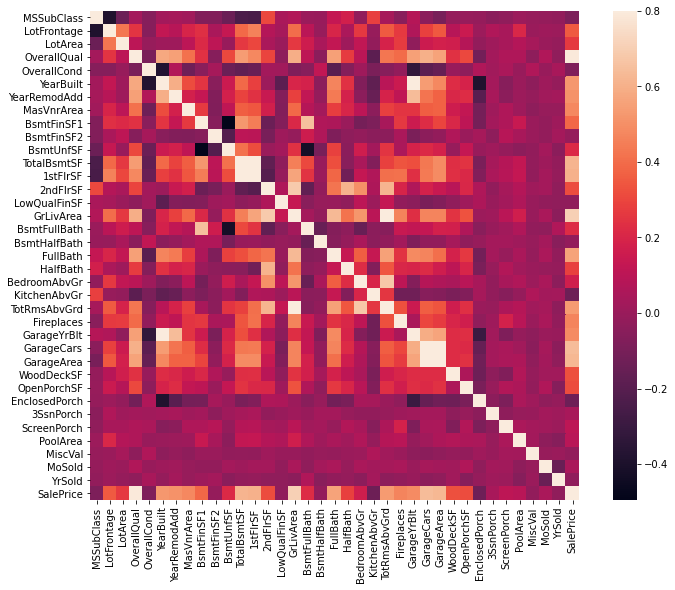

In [15]:
# 画出相关系数的热力图
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, ax=ax)  # square参数保证corrmat为非方阵时，图形整体输出仍为正方形
plt.show()

发现有些特征有着高度相关性，接下来选出与‘SalePrice’相关系数最高的10个特征查看它们的相关情况

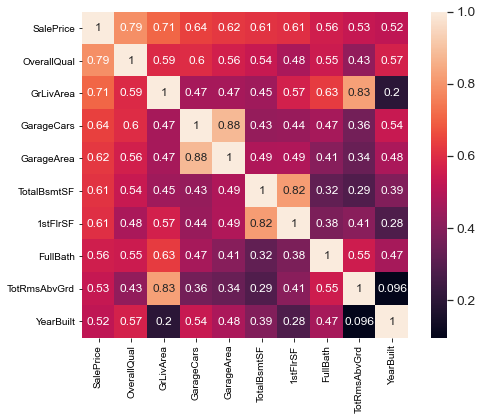

In [16]:
k = 10
top10_attr = corrmat.nlargest(k, 'SalePrice').index # 取出最大的10个特征的相关矩阵 
top10_mat = corrmat.loc[top10_attr, top10_attr]
fig,ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.25) # 设置方块中的字体大小
sns.heatmap(top10_mat, annot=True, annot_kws={'size':12}, square=True)# 设置annot使其在小格内显示数字，annot_kws调整数字格式
plt.show()

从上图中可以看出：
+ 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' 和'SalePrice'具有较强的相关性；
+ 'GarageCars' 和 'GarageArea' 这两个特征之间的相关性比较高
+ 'TotalBsmtSF' 和 '1stFloor' 这两个特征之间的相关性比较高
+ 'GrLivArea' 和 'TotRmsAbvGrd'  这两个特征之间的相关性比较高

所以这里将与 'SalePrice' 相关性低的 'GarageArea','1stFlrSF' 和 'TotRmsAbvGrd' 删除  

In [17]:
all_data.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],inplace=True,axis=1) # 删除

之后对剩下的7个特征做散点图预览

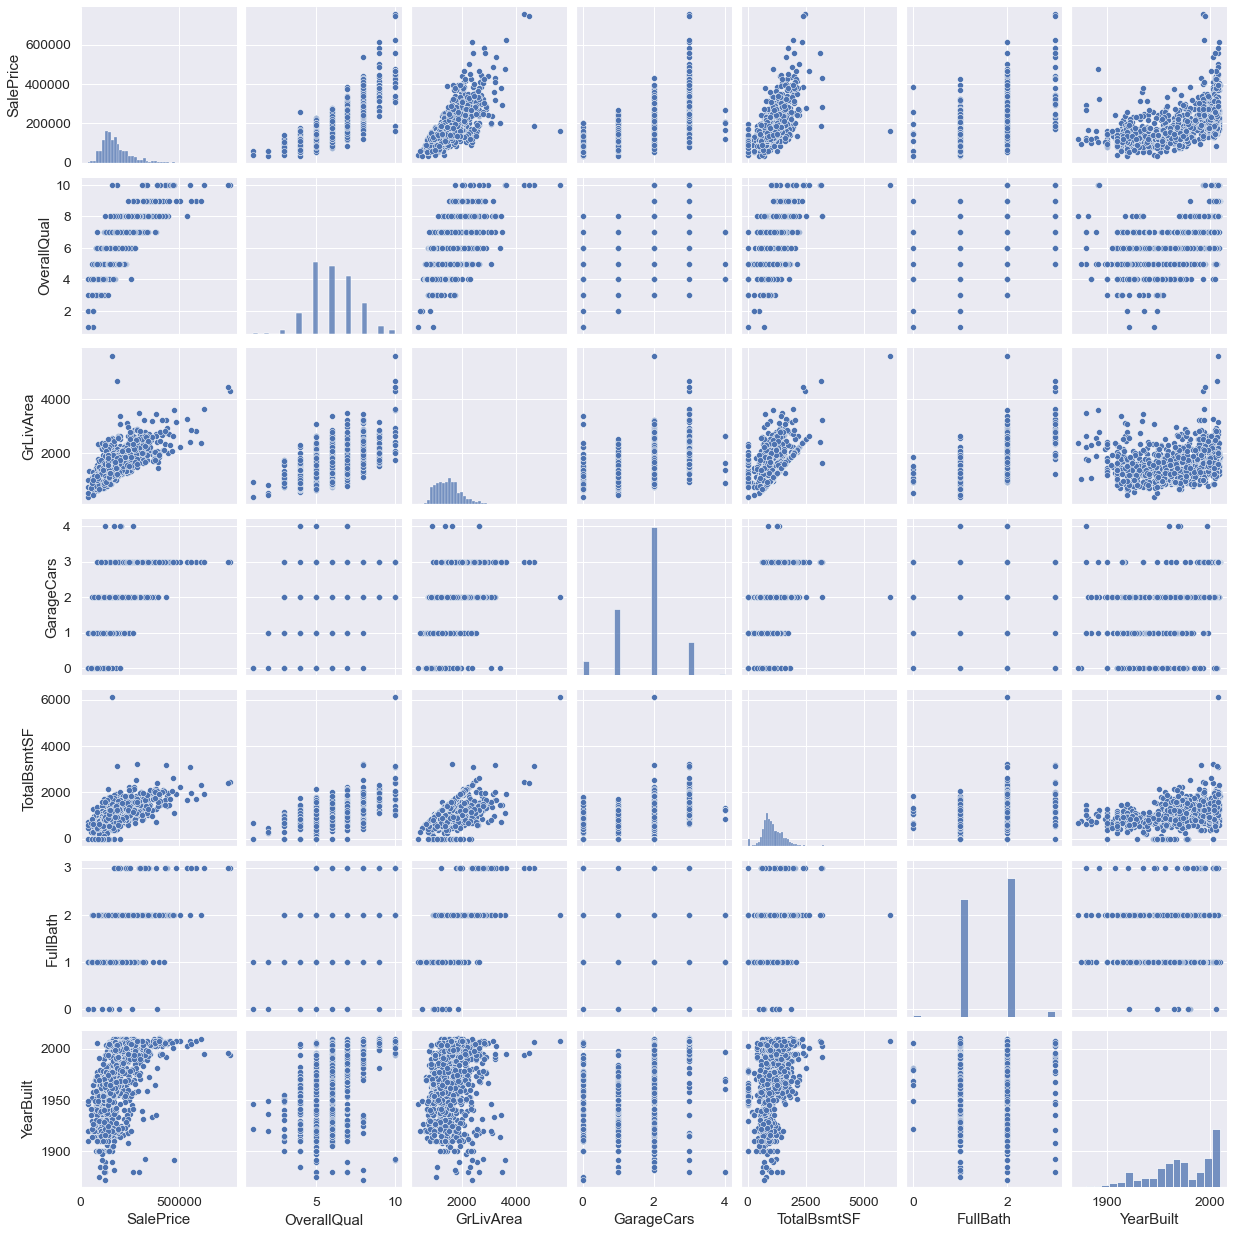

In [18]:
var_set = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set(font_scale=1.25)  # 设置横纵坐标轴的字体大小
sns.pairplot(train_data[var_set])  # 7*7图矩阵
plt.show()

## 2.3 特征分析

继续深入查看 data_description.txt 文件会发现，有一些特征虽然是数值型的，但其代表只是不同的类别。它的数值并没有大小之分，所以这里将其改为类别特征。

In [19]:
list4=['MSSubClass','YrSold','MoSold']
for col in list4:
    all_data[col]=all_data[col].astype(str) # 将数值型变量改为字符型变量

同时，有些特征恰恰相反，虽为类别特征，但其却含有高低好坏之分。这里将这些类别特征映射成数值类型来体现其大小关系。

In [20]:
#将类别特征映射成数值
list5=['KitchenQual','PoolQC','HeatingQC','ExterCond','ExterQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','BsmtQual']
for col in list5:
    all_data[col]=all_data[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

all_data['GarageFinish'] = all_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
all_data['BsmtExposure'] = all_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
all_data['Functional'] = all_data['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1, 'None': 0})
all_data['Fence'] = all_data['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0})
all_data['LandSlope'] = all_data['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1, 'None': 0})
all_data['LotShape'] = all_data['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, 'None': 0})
all_data['PavedDrive'] = all_data['PavedDrive'].map({'Y': 3, 'P': 2, 'N': 1, 'None': 0})
all_data['Street'] = all_data['Street'].map({'Pave': 2, 'Grvl': 1, 'None': 0})
all_data['Alley'] = all_data['Alley'].map({'Pave': 2, 'Grvl': 1, 'None': 0})
all_data['CentralAir'] = all_data['CentralAir'].map({'Y': 1, 'N': 0})

# 三、特征工程

## 3.1 目标值分析

SalePrice 是我们预测的目标，因此需要对其进行分析和处理。

画出SalePrice的分布图和QQ图（如果QQ图上的点在一条直线附近，则说明数据近似于正态分布，且该直线的斜率为标准差，截距为均值）。

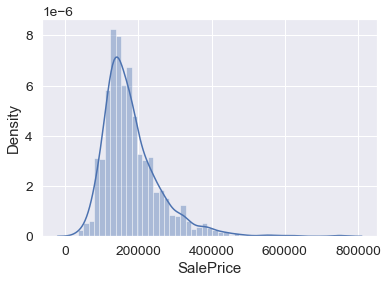

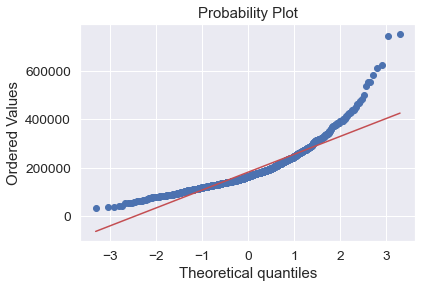

In [22]:
# 画分布图
sns.distplot(SalePrice);
# 画QQ图
fig = plt.figure()
res = stats.probplot(SalePrice, plot=plt)
plt.show()

从中可以看出 SalePrice 的分布并非是正态分布，但线性回归模型的要求因变量服从正态分布。

所以这里将其进行对数变换，使其尽量满足正态分布。

此外，由于Kaggle最终是对预测值的对数的误差进行评估，所以在本地测试的时候也应该用同样的标准。

这是常见的用于回归问题的指标 :
$\sqrt{\frac{\sum_{i=1}^N{\left( y_i-\hat{y}_i \right) ^2}}{N}}$


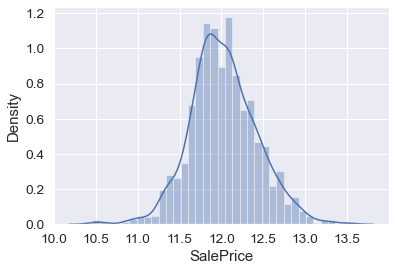

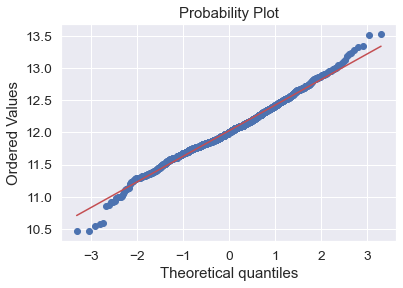

In [23]:
SalePrice=np.log1p(SalePrice) # 对 SalePrice 进行对数变换

# 画分布图
sns.distplot(SalePrice);
# 画QQ图
fig = plt.figure()
res = stats.probplot(SalePrice, plot=plt)
plt.show()

## 3.2独热编码

对于类别特征，我们将其转化为独热编码。

这样既解决了模型不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。

In [24]:
# 独热编码
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 350)


最后将 train 和 test 分离

In [25]:
# 分离训练集和测试集
train = all_data[:train_num]
test = all_data[train_num:]

## 3.3 数据标准化

由之前的图可以看出，数据集有一些离群点，因此用 RobustScaler 对数据集进行标准化处理。

In [26]:
# 标准化数据
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

# 四、模型训练

## 4.1 评价函数

定义评价函数

采用5折交叉验证,与比赛的评价标准一致，

用Root-Mean-Squared-Error (RMSE)来为每个模型打分。

In [27]:
# 定义评价函数
def rmsle_cv(model):
    # n_splits=5 
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train)# 随机种子为 42
    rmse= np.sqrt(-cross_val_score(model, train, SalePrice, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 4.2 基本模型

+ 套索回归
+ 弹性网络
+ 梯度提升回归
+ XGBoost
+ LightGBM

In [28]:
#定义模型
lasso = Lasso(alpha=0.0005, random_state=1)
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=1000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,
                              verbose=-1)

训练模型并查看他们的的评分

In [ ]:
# 训练模型并输出分数
scores = [rmsle_cv(lasso), rmsle_cv(ENet), rmsle_cv(GBoost),rmsle_cv(model_xgb),rmsle_cv(model_lgb)]
name_list=['lasso','ENet','GBoost','model_xgb','model_lgb']
for name,score in zip(name_list,scores):
    print(name+" score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

最后得分为：
+ Lasso score: 0.1342 (0.0282)
+ ElasticNet score: 0.1341 (0.0279)
+ Gradient Boosting score: 0.1229 (0.0113)
+ Xgboost score: 0.1226 (0.0102)
+ LGBM score: 0.1234 (0.0069)

可以看出后面三个模型的分数比较好

## 4.3 集成学习

**集成学习**往往能进一步提高模型的准确度，这里将运用**加权平均**方法来进行预测。

In [33]:
# 集成学习的加权平均方法
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

这里将用 *Lasso*, *ENet*, *GBoost*, *model_lgb*, *model_xgb* 作为学习器。

因为后三个模型的评分比较高，所以给他们的权重也较高。

In [40]:
weight_avg = AverageWeight(mod = [lasso,ENet,GBoost,model_lgb,model_xgb],weight = [0.15,0.15,0.2,0.25,0.25])# weight为权重

查看评分

In [ ]:
score=rmsle_cv(weight_avg)
print("AverageWeight score: {:.4f} ({:.4f})".format(score.mean(), score.std()))# 输出分数

AverageWeight score: 0.1197 (0.0132)

这个分数比单独的模型分数更高。所以最后用该模型进行预测测试集

## 4.4 最终预测

In [ ]:
weight_avg.fit(train,SalePrice)# 用所有的数据训练模型
pred = np.exp(weight_avg.predict(test)) # 还原预测数据
# 生成提交文件
result=pd.DataFrame({'Id':test_data.index, 'SalePrice':pred})
result.to_csv("submission.csv",index=False)

# 结果

![图片](ans.png "答案")


最后的分数是0.11947。

# 参考资料
> [Kaggle比赛（二）House Prices: Advanced Regression Techniques](https://blog.csdn.net/adamding1999/article/details/99897367)
> 
> [Kaggle竞赛 —— 房价预测 (House Prices)](https://www.cnblogs.com/massquantity/p/8640991.html)
>
> [Kaggle：House Prices: Advanced Regression Techniques 数据预处理](https://blog.csdn.net/weixin_30399155/article/details/95615195?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163756435816780261921600%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=163756435816780261921600&biz_id=0&spm=1018.2226.3001.4187)
>
> []()